# Simulated Data

Notes: 
- 30 patients: 10 adults / children / adolecents
- Used the basal-bolus controller

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('simglucose.csv', parse_dates=['date'], index_col='date')

In [22]:
df.head()

,id,CGM,carbs,insulin,scheduled_basal,basal,bolus,TDD,isf,cr,insulin_type,weight,ice,iob
date,,,,,,,,,,,,,,
2025-07-31 00:00:00,adolescent#001,146.855111,0.0,0.069667,0.836,0.836,0.0,39.31,45.79,12.72,novolog,151.470622,NaN,NaN
2025-07-31 00:05:00,adolescent#001,146.680246,0.0,0.069667,0.836,0.836,0.0,39.31,45.79,12.72,novolog,151.470622,NaN,1.387779e-17
2025-07-31 00:10:00,adolescent#001,146.453208,0.0,0.069667,0.836,0.836,0.0,39.31,45.79,12.72,novolog,151.470622,NaN,2.775558e-17
2025-07-31 00:15:00,adolescent#001,146.362645,0.0,0.069667,0.836,0.836,0.0,39.31,45.79,12.72,novolog,151.470622,NaN,4.159992e-17
2025-07-31 00:20:00,adolescent#001,146.622349,0.0,0.069667,0.836,0.836,0.0,39.31,45.79,12.72,novolog,151.470622,NaN,5.534941e-17


## Some Stats

<Axes: >

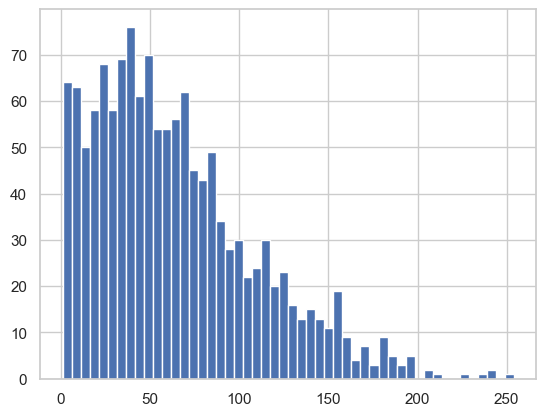

In [23]:
# Plot histogram of carb quantities
df['carbs'][df['carbs'] > 0].hist(bins=50)

/var/folders/q1/5jqy1fgs07j9ptpmdsmmhxnw0000gn/T/ipykernel_44568/3892776295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['hour'] = filtered.index.hour  # This assumes df.index is datetime


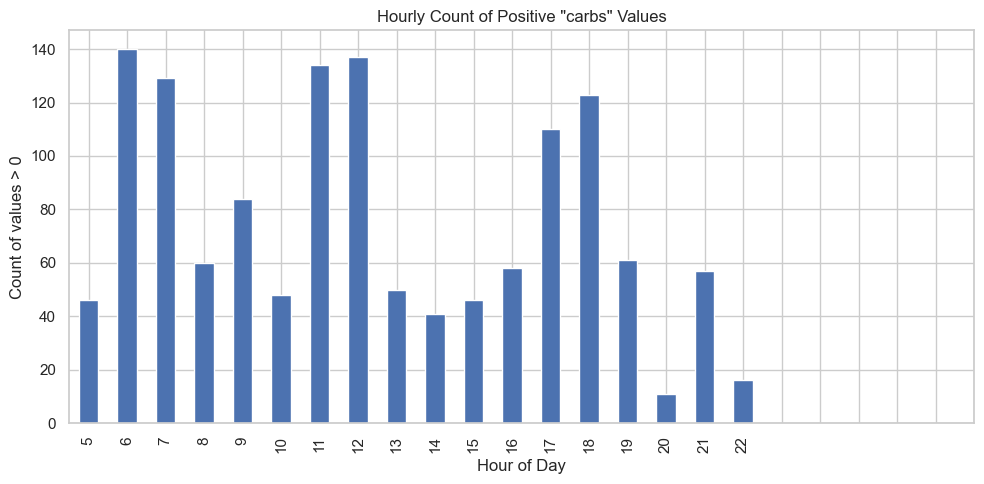

In [24]:
filtered = df[df['carbs'] > 0]

# Step 2: Extract the hour of the day from the index
filtered['hour'] = filtered.index.hour  # This assumes df.index is datetime

# Step 3: Count how many times each hour occurs
hourly_counts = filtered['hour'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Count of values > 0')
plt.title('Hourly Count of Positive "carbs" Values')
plt.xticks(range(0, 24))
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

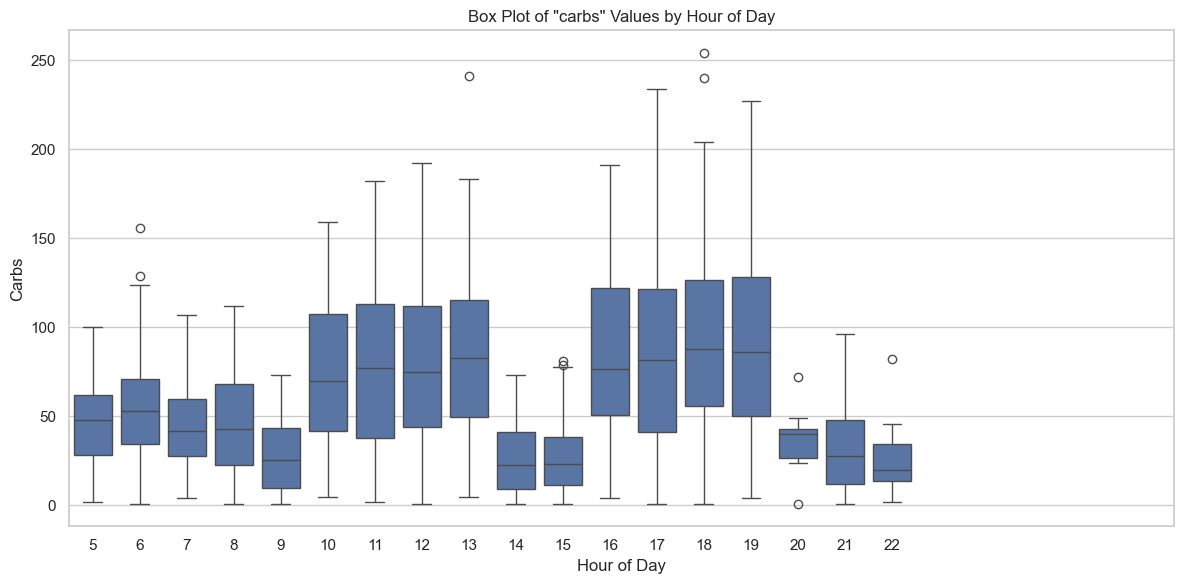

In [25]:
# Add 'hour' column
df['hour'] = df.index.hour

# Set style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='carbs', data=df[df['carbs'] > 0], whis=1.5, showfliers=True)

plt.title('Box Plot of "carbs" Values by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Carbs')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [26]:
# How varied is the starting bg for a meal? 
starting_bgs = df[df['carbs'] > 0]['CGM']
print("Min bg,", starting_bgs.min())
print("Max bg,", starting_bgs.max())
print("Mean bg,", starting_bgs.mean())
print("Std bg,", starting_bgs.std())

Min bg, 39.0
Max bg, 449.63370443082954
Mean bg, 107.33680229898081
Std bg, 45.593652111813604


<Axes: ylabel='Frequency'>

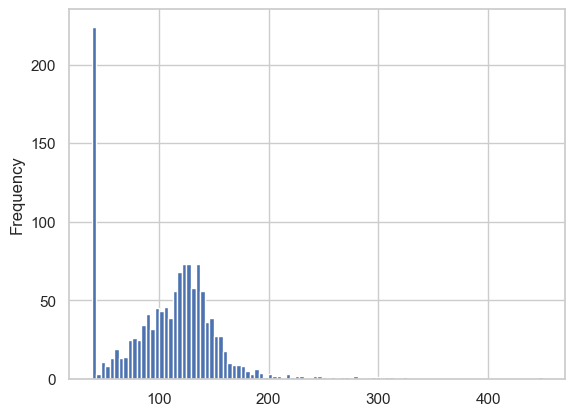

In [27]:
starting_bgs.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

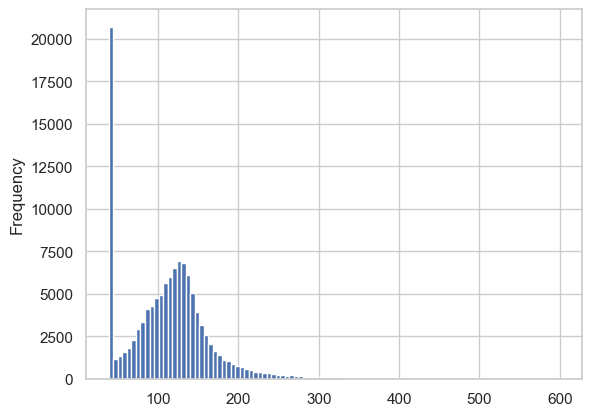

In [28]:
df['CGM'].plot.hist(bins=100)

In [30]:
df[df['CGM'] < 40]

,id,CGM,carbs,insulin,scheduled_basal,basal,bolus,TDD,isf,cr,insulin_type,weight,ice,iob,hour
date,,,,,,,,,,,,,,,
2025-08-02 00:25:00,adolescent#002,39.198595,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,-0.09,0.0,0
2025-08-02 00:30:00,adolescent#002,39.108604,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.58,0.0,0
2025-08-02 00:35:00,adolescent#002,39.686088,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.64,0.0,0
2025-08-02 01:20:00,adolescent#002,39.000000,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.00,0.0,1
2025-08-02 01:25:00,adolescent#002,39.000000,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-13 23:35:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23
2025-08-13 23:40:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23
2025-08-13 23:45:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23


The long-lasting hypos are probably because the controller uses a simple bolus-basal strategy, and there is no mechanisms and no meals added to save hypos. 

In [41]:
print("TIR", round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100))
print("TAR", round(len(df[df['CGM'] >= 180]) / len(df) * 100))
print("TBR", round(len(df[df['CGM'] <= 70]) / len(df) * 100))

TIR 69
TAR 8
TBR 23


Dosing is generally aggressive in this strategy, a more standard distribution would be TBR 2-4% and TAR ~30%.